In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# 1. Ilustracija efekta kasnjenja kauzalnih ZOH i FOH D/A konvertora

In [3]:
Ta=0.01  # perioda aproksimacije analognog signala
Tr=5  # trajanje intervala
t=np.linspace(0,Tr,int(Tr/Ta)+1)  # (aproksimativna) vremenska osa analognog signala

u=np.cos(np.pi*t)+np.cos(2*np.pi*t)  # (aproksimativno) analogni signal 

Td=0.5  # perioda odabiranja
T=int(round(Td/Ta))  # broj odbiraka "analognog" signala u jednoj periodi odabiranja

td=np.linspace(0,Tr,int(Tr/Td)+1)  # vremenska osa diskretnog signala
ud=u[::T]  # signal posle diskretizacije, uzimamo svaki T-ti odbirak

u1=np.zeros_like(u)  # signal posle diskretizacije i rekonstrukcije
for i in range(0,len(t)//T):
    for j in range(0,T):
        u1[T*i+j]=u[T*i]

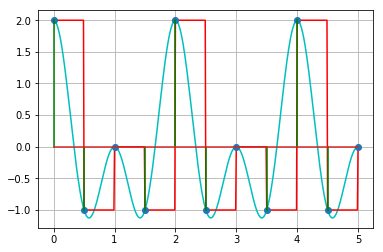

In [4]:
plt.plot(t,u,'c',t,u1,'r')
plt.stem(td,ud,'g')
plt.grid()
plt.show()

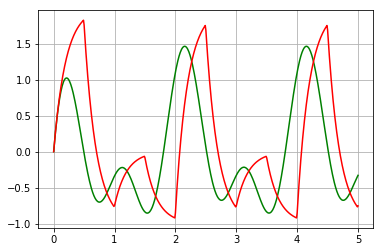

In [5]:
# Odzivi nekih sistema:
G1 = signal.lti([5],[1,5])
tt,y1,x1=signal.lsim(G1,u,t)
tt,y2,x2=signal.lsim(G1,u1,t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.grid()
plt.show()

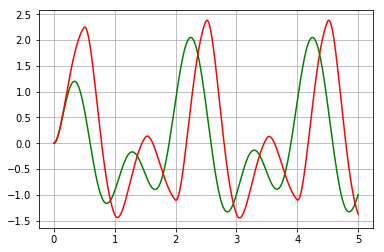

In [6]:
G1 = signal.lti([36],[1,6,36])
tt,y1,x1=signal.lsim(G1,u,t)
tt,y2,x2=signal.lsim(G1,u1,t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.grid()
plt.show()

In [7]:
#Zadatak: Uraditi iste simulacije ako je FOH umesto ZOH

In [8]:
#nekauzalni

u1=np.zeros_like(u)  # signal posle diskretizacije i rekonstrukcije


for i in range(0,len(t)//T-1):
    for j in range(0,T):
        u1[T*i+j]=u[T*i]+j*(u[T*(i+1)]-u[T*(i)])/T

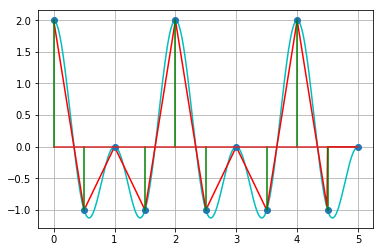

In [9]:
plt.plot(t,u,'c',t,u1,'r')
plt.stem(td,ud,'g')
plt.grid()
plt.show()

In [10]:
#kauzalni

u1=np.zeros_like(u)  # signal posle diskretizacije i rekonstrukcije

for i in range(0,len(t)//T-1):
    for j in range(0,T):
        u1[T*i+j+T]=u[T*i]+j*(u[T*(i+1)]-u[T*(i)])/T

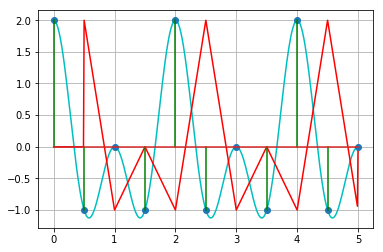

In [11]:
plt.plot(t,u,'c',t,u1,'r')
plt.stem(td,ud,'g')
plt.grid()
plt.show()

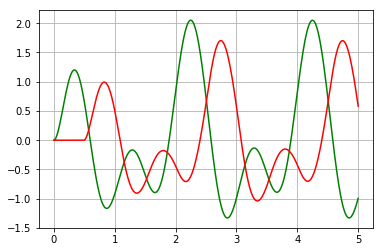

In [12]:
G1 = signal.lti([36],[1,6,36])
tt,y1,x1=signal.lsim(G1,u,t)
tt,y2,x2=signal.lsim(G1,u1,t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.grid()
plt.show()

In [13]:
# Vidimo da FOH ima vece kasnjenje (iako bolje izgladi krivu) tako da je primena u SAU retka 

In [14]:
# 2. Demonstracija  Nikvistove teoreme odabiranja i preklapanja (Aliasing)

In [15]:
#ZOH
Ta=0.01  # perioda aproksimacije analognog signala
Tr=5  # trajanje intervala
t=np.linspace(0,Tr,int(Tr/Ta)+1)  # (aproksimativna) vremenska osa analognog signala

u=np.cos(np.pi*t)+np.cos(2*np.pi*t)  # (aproksimativno) analogni signal 

Td=1  # perioda odabiranja
T=int(round(Td/Ta))  # broj odbiraka "analognog" signala u jednoj periodi odabiranja

td=np.linspace(0,Tr,int(Tr/Td)+1)  # vremenska osa diskretnog signala
ud=u[::T]  # signal posle diskretizacije, uzimamo svaki T-ti odbirak

u1=np.zeros_like(u)  # signal posle diskretizacije i rekonstrukcije
for i in range(0,len(t)//T):
    for j in range(0,T):
        u1[T*i+j]=u[T*i]

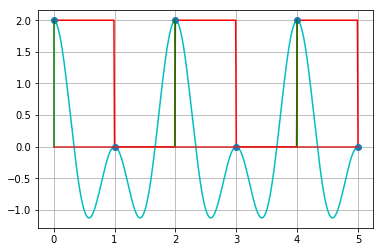

In [16]:
plt.plot(t,u,'c',t,u1,'r')
plt.stem(td,ud,'g')
plt.grid()
plt.show()

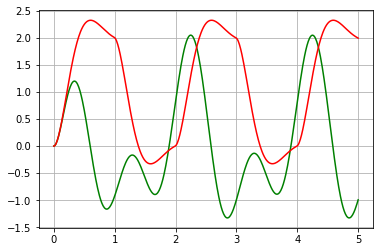

In [17]:
G1 = signal.lti([36],[1,6,36])
tt,y1,x1=signal.lsim(G1,u,t)
tt,y2,x2=signal.lsim(G1,u1,t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.grid()
plt.show()

In [18]:
# Posle odabiranja i rekonstrukcije komponenta na frekvenciji 1Hz se "preklopila" u DC komponentu!

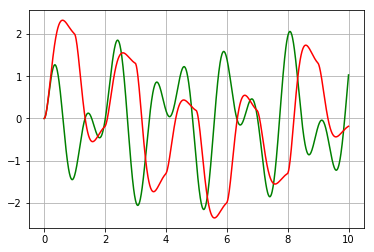

In [20]:
Ta=0.01  # perioda aproksimacije analognog signala
Tr=10  # trajanje intervala
t=np.linspace(0,Tr,int(Tr/Ta)+1)  # (aproksimativna) vremenska osa analognog signala

u=np.cos(np.pi*t)+np.cos(0.9*2*np.pi*t)  # (aproksimativno) analogni signal 

Td=1  # perioda odabiranja
T=int(round(Td/Ta))  # broj odbiraka "analognog" signala u jednoj periodi odabiranja

td=np.linspace(0,Tr,int(Tr/Td)+1)  # vremenska osa diskretnog signala
ud=u[::T]  # signal posle diskretizacije, uzimamo svaki T-ti odbirak

u1=np.zeros_like(u)  # signal posle diskretizacije i rekonstrukcije
for i in range(0,len(t)//T):
    for j in range(0,T):
        u1[T*i+j]=u[T*i]
        
G1 = signal.lti([36],[1,6,36])
tt,y1,x1=signal.lsim(G1,u,t)
tt,y2,x2=signal.lsim(G1,u1,t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.grid()
plt.show()

In [21]:
# Posle odabiranja i rekonstrukcije komponenta na frekvenciji 0.9Hz se "preklopila" na 0.1Hz!

In [22]:
# 3. Ilustracija metoda diskretizacije: 
# a) step invarijantna, 
# b) integraljenje unazad (Euler), 
# c) integraljenje unapred, 
# d) bilinearna (Tustin), 
# e) modifikovana bilinearna

In [23]:
# a) step invarijantna metoda
GG = ([],[-1,-2],[2])
T=0.5
#T=np.log(2)
zeros, poles, gain, dt=signal.cont2discrete(GG, T, method='zoh')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1549: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


In [24]:
G=signal.lti(GG[0],GG[1],GG[2])
Gd = signal.dlti(zeros, poles, gain,dt=T)

t_max=10
ttd=np.linspace(0,t_max,int(t_max/T))

ttc=np.linspace(0,t_max,10000)

td,yd=Gd.step(t=ttd)
tc,yc=G.step(T=ttc)

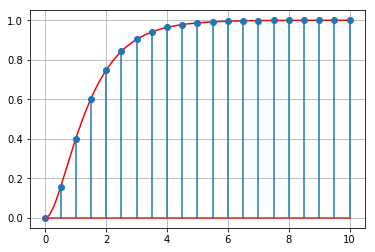

In [25]:
#plt.plot(tc,yc,td,yd[0])
plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

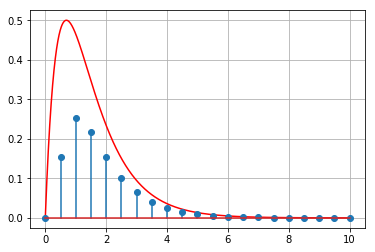

In [26]:
td,yd=Gd.impulse(t=ttd)
tc,yc=G.impulse(T=ttc)
plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1549: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


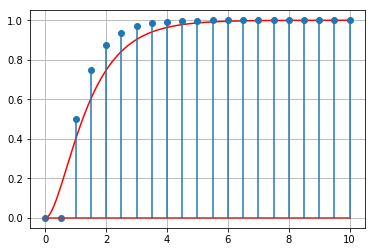

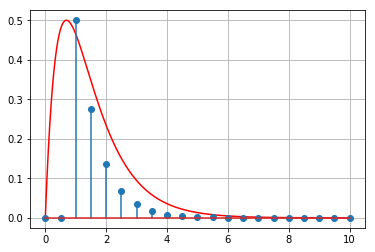

In [27]:
#b) integraljenje unapred (Euler)-diskretni ekvivalent moze da postane nestabilan iako je originalni analogni sistem bio stabilan

zeros, poles, gain, dt=signal.cont2discrete(GG, T, method='euler')
Gd = signal.dlti(zeros, poles, gain,dt=T)

td,yd=Gd.step(t=ttd)
tc,yc=G.step(T=ttc)

plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

td,yd=Gd.impulse(t=ttd)
tc,yc=G.impulse(T=ttc)
plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

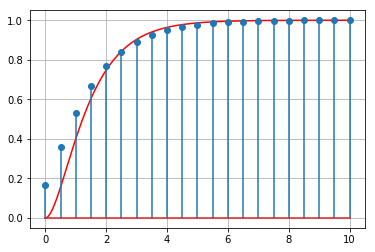

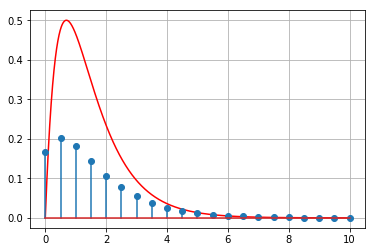

In [28]:
# c) integraljenje unazad
zeros, poles, gain, dt=signal.cont2discrete(GG, T, method='backward_diff')
Gd = signal.dlti(zeros, poles, gain,dt=T)


td,yd=Gd.step(t=ttd)
tc,yc=G.step(T=ttc)

plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

td,yd=Gd.impulse(t=ttd)
tc,yc=G.impulse(T=ttc)
plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

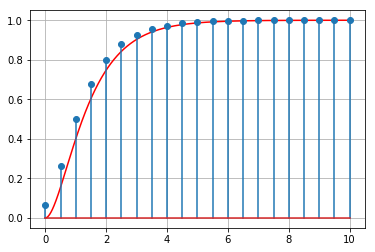

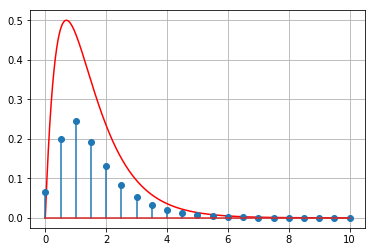

In [29]:
# d) bilinearna (Tustinov metod)

zeros, poles, gain, dt=signal.cont2discrete(GG, T, method='bilinear')
Gd = signal.dlti(zeros, poles, gain,dt=T)

td,yd=Gd.step(t=ttd)
tc,yc=G.step(T=ttc)

plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

td,yd=Gd.impulse(t=ttd)
tc,yc=G.impulse(T=ttc)
plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

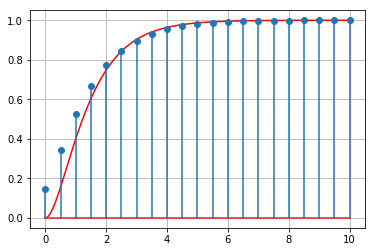

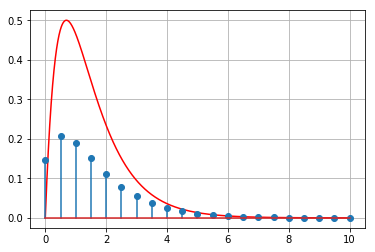

In [30]:
# e) generalizovana bilinearna (zavisi od parametra alpha, alpha=0.5-Tustinov metod, alpha=0-Euler unapred, alpha=1-Euler unazad)

zeros, poles, gain, dt=signal.cont2discrete(GG, T, method='gbt', alpha=0.9)
Gd = signal.dlti(zeros, poles, gain,dt=T)

td,yd=Gd.step(t=ttd)
tc,yc=G.step(T=ttc)

plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

td,yd=Gd.impulse(t=ttd)
tc,yc=G.impulse(T=ttc)
plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()